<a href="https://colab.research.google.com/github/xxilytoo/TAMUSEADataChallenge/blob/main/Vector_AutoRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read in CSV File to see if inputs are right
df = pd.read_csv("finaldata.csv")
df.head()

,Time,Location Hashed,Mean Sea Level Rise,MBSL,MGRD,MIBE,MRes
0,1900.000000,fb3t5ddw3,7011.655440,-122.922944,-65.23750,-26.204083,7103.097023
1,1900.083333,fb3t5ddw3,7023.881174,-133.028206,-64.93125,-8.971881,7097.784305
2,1900.166667,fb3t5ddw3,7021.399124,-69.263509,-64.62500,-16.899310,7102.923434
3,1900.250000,fb3t5ddw3,7013.181308,0.339878,-64.31875,52.904386,7024.595673
4,1900.333333,fb3t5ddw3,7015.986699,25.386330,-64.01250,39.816255,7040.182945


<ipython-input-3-8844ace9c0a7>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


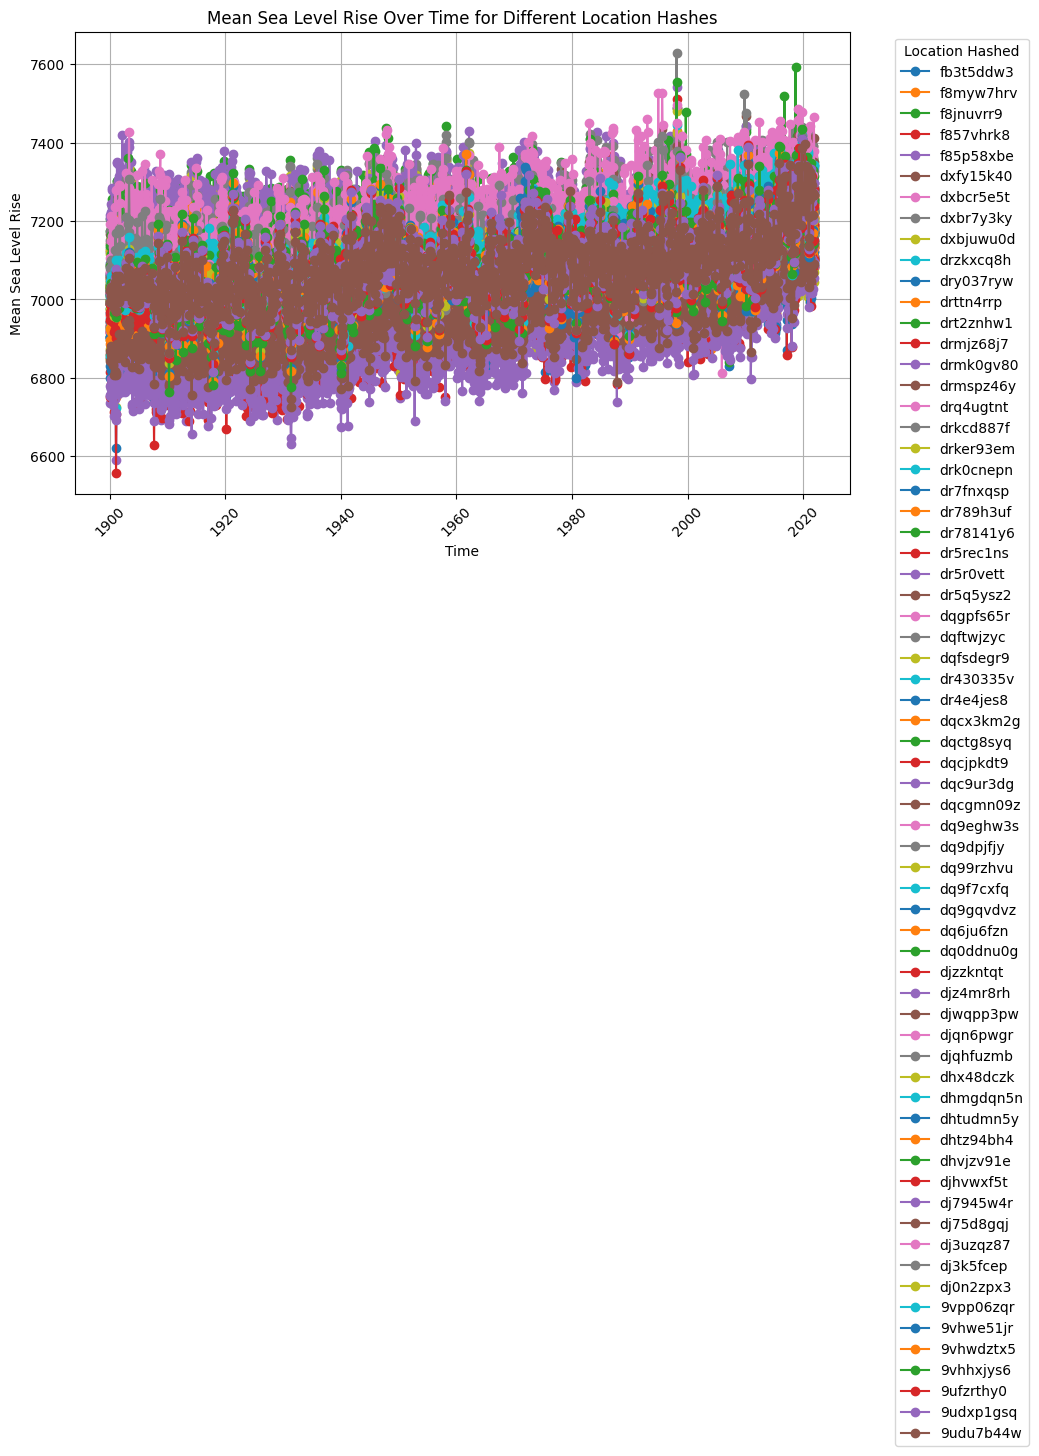

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named "sea_level_data.csv"
# Adjust the filename accordingly if your data is in a different format
file_path = "finaldata.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Get unique location hashes
unique_hashes = data['Location Hashed'].unique()

# Plotting
plt.figure(figsize=(10, 6))
for location_hash in unique_hashes:
    location_data = data[data['Location Hashed'] == location_hash]
    plt.plot(location_data['Time'], location_data['Mean Sea Level Rise'], marker='o', linestyle='-', label=location_hash)

plt.title('Mean Sea Level Rise Over Time for Different Location Hashes')
plt.xlabel('Time')
plt.ylabel('Mean Sea Level Rise')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Location Hashed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Iterate over each unique location hash
for location_hash in unique_hashes:
    # Filter the data based on the location hash
    location_data = data[data['Location Hashed'] == location_hash]

    # Define the filename for the CSV file
    output_file = f"{location_hash}.csv"

    # Save the filtered data to a CSV file
    location_data.to_csv(output_file, index=False)


In [ ]:
dm = pd.read_csv("fb3t5ddw3.csv", index_col='Time')
dm = dm.drop(columns=["Location Hashed"])
dm.head()

,Mean Sea Level Rise,MBSL,MGRD,MIBE,MRes
Time,,,,,
1900.000000,7011.655440,-122.922944,-65.23750,-26.204083,7103.097023
1900.083333,7023.881174,-133.028206,-64.93125,-8.971881,7097.784305
1900.166667,7021.399124,-69.263509,-64.62500,-16.899310,7102.923434
1900.250000,7013.181308,0.339878,-64.31875,52.904386,7024.595673
1900.333333,7015.986699,25.386330,-64.01250,39.816255,7040.182945


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dm.shape

(1464, 5)

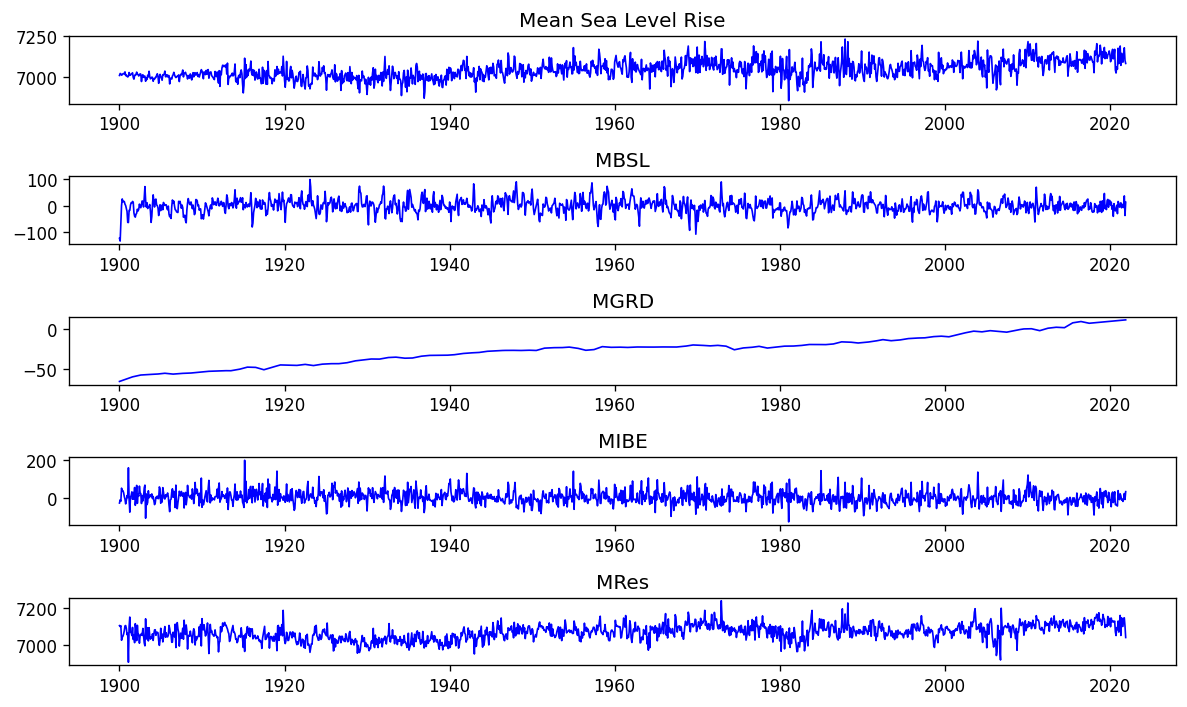

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
  data = dm[dm.columns[i]]
  ax.plot(data, color='blue', linewidth=1)
  ax.set_title(dm.columns[i])
plt.tight_layout();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [ ]:
#Verfies if data is stationary
#p-value <0.05 for it to be stationary
ad_fuller_result_1 = adfuller(dm['Mean Sea Level Rise'])

print('Mean Sea Level Rise')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(dm['MGRD'])

print('MGRD')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Mean Sea Level Rise
ADF Statistic: -3.770758879493946
p-value: 0.003221065795917707

---------------------

MGRD
ADF Statistic: -0.009879933667011006
p-value: 0.9577073558531978


In [ ]:
#covert MGRD to stationary
# Remove missing values from the differenced MGRD data
diff_mgrd = dm['MGRD'].diff()[1:]
diff_mgrd = diff_mgrd.dropna()

# Perform the ADF test on the differenced MGRD data
ad_fuller_result_2change = adfuller(diff_mgrd)

# Print the ADF test results
print('MGRD')
print(f'ADF Statistic: {ad_fuller_result_2change[0]}')
print(f'p-value: {ad_fuller_result_2change[1]}')

MGRD
ADF Statistic: -6.682422264548762
p-value: 4.308720780083251e-09


In [ ]:
#check if MSLR is correlated with MGRD
#p-val less than 0.05 means that lag's causation should be used
print("does mslr cause mgrd")
granger_1 = grangercausalitytests(dm[['Mean Sea Level Rise','MGRD']],4)

does mslr cause mgrd

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=240.8004, p=0.0000  , df_denom=1460, df_num=1
ssr based chi2 test:   chi2=241.2952, p=0.0000  , df=1
likelihood ratio test: chi2=223.3453, p=0.0000  , df=1
parameter F test:         F=240.8004, p=0.0000  , df_denom=1460, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=77.4728 , p=0.0000  , df_denom=1457, df_num=2
ssr based chi2 test:   chi2=155.4773, p=0.0000  , df=2
likelihood ratio test: chi2=147.7532, p=0.0000  , df=2
parameter F test:         F=77.4728 , p=0.0000  , df_denom=1457, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=39.6266 , p=0.0000  , df_denom=1454, df_num=3
ssr based chi2 test:   chi2=119.4521, p=0.0000  , df=3
likelihood ratio test: chi2=114.8197, p=0.0000  , df=3
parameter F test:         F=39.6266 , p=0.0000  , df_denom=1454, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

In [ ]:
#8 min video
print("does MGRD cause MSLR")
granger_2 = grangercausalitytests(dm[["MGRD","Mean Sea Level Rise"]], 5)

does MGRD cause MSLR

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4589  , p=0.2273  , df_denom=1460, df_num=1
ssr based chi2 test:   chi2=1.4619  , p=0.2266  , df=1
likelihood ratio test: chi2=1.4612  , p=0.2267  , df=1
parameter F test:         F=1.4589  , p=0.2273  , df_denom=1460, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6009  , p=0.5485  , df_denom=1457, df_num=2
ssr based chi2 test:   chi2=1.2059  , p=0.5472  , df=2
likelihood ratio test: chi2=1.2054  , p=0.5473  , df=2
parameter F test:         F=0.6009  , p=0.5485  , df_denom=1457, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4260  , p=0.7344  , df_denom=1454, df_num=3
ssr based chi2 test:   chi2=1.2841  , p=0.7329  , df=3
likelihood ratio test: chi2=1.2835  , p=0.7330  , df=3
parameter F test:         F=0.4260  , p=0.7344  , df_denom=1454, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

In [ ]:
#should use lag of 1 for mslr and lag of 5 for mgrd
dm = dm[['Mean Sea Level Rise','MGRD']]
print(dm.shape)

(1464, 2)


In [ ]:
from sklearn import model_selection as sk
train_data, test_data = sk.train_test_split(dm, train_size = 0.8, shuffle=False)
print(train_data.shape)
print(test_data.shape)

(1171, 2)
(293, 2)


In [ ]:
#Experimenting to find lags
traindiff = train_data.diff()[1:]
traindiff.dropna(inplace=True) #drops all NaN values
model = VAR(traindiff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.531       3.540       34.15       3.534
1        1.513       1.540       4.542       1.523
2        1.446       1.490       4.247       1.463
3        1.384       1.446       3.993       1.408
4        1.339       1.418       3.817       1.369
5        1.326       1.422       3.764       1.362
6        1.319       1.434       3.742       1.363
7        1.297       1.428       3.658       1.346
8        1.288       1.437       3.624       1.344
9        1.274       1.440       3.573       1.336
10       1.270       1.454       3.560       1.339
11       1.269       1.470       3.556       1.345
12       1.260       1.479       3.525       1.343
13      1.175*      1.412*      3.239*      1.265*
14       1.180       1.435       3.254       1.276
15       1.177       1.449       3.246       1.280
16       1.180       1.469     

In [ ]:
#use 13 lags as results show

In [ ]:
final_var = VARMAX(train_data, order=(13,0), enforce_stationarity = True)
final_fitted = final_var.fit(disp=False)
print(final_fitted.summary)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  Statespace Model Results                                 
Dep. Variable:     ['Mean Sea Level Rise', 'MGRD']   No. Observations:                 1171
Model:                                     VAR(13)   Log Likelihood               -4014.045
                                       + intercept   AIC                           8142.090
Date:                             Tue, 26 Mar 2024   BIC                           8430.829
Time:                                     05:00:10   HQIC                          8250.987
Sample:                                          0                                         
                                            - 1171                                         
Covariance Type:                               opg                                         
Ljung-Box (L1) (Q):             0.00, 0.03   Jarque-Bera (JB):     118.24, 92878.54
Prob(Q):                        0.95, 0.86   Prob(JB):                   0.00, 0.00
Hete

In [ ]:
forecastnum = 293
predict = final_fitted.get_prediction(start = len(train_data), end = len(train_data) + forecastnum - 1)
predictions = predict.predicted_mean
predictions.columns = ["MSLR Predicted", "MGRD Predicted"]
print(predictions)

      MSLR Predicted  MGRD Predicted
1171     7084.722230      -11.098275
1172     7083.853699      -11.117293
1173     7081.529737      -11.148407
1174     7084.856091      -11.186922
1175     7085.060479      -11.232034
...              ...             ...
1459     7057.169889      -18.965749
1460     7057.135156      -18.985790
1461     7057.100477      -19.005800
1462     7057.065852      -19.025780
1463     7057.031281      -19.045728

[293 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
dz = pd.read_csv("fb3t5ddw3.csv")
dz = dz[1171:]
dz = dz[["Time"]]
finalprediction = pd.concat([dz.reset_index(drop = True), predictions.reset_index(drop = True)], axis = 1)
finalprediction.set_index("Time", inplace = True)
finalprediction.head()

,MSLR Predicted,MGRD Predicted
Time,,
1997.583333,7084.722230,-11.098275
1997.666667,7083.853699,-11.117293
1997.750000,7081.529737,-11.148407
1997.833333,7084.856091,-11.186922
1997.916667,7085.060479,-11.232034


<Axes: xlabel='Time'>

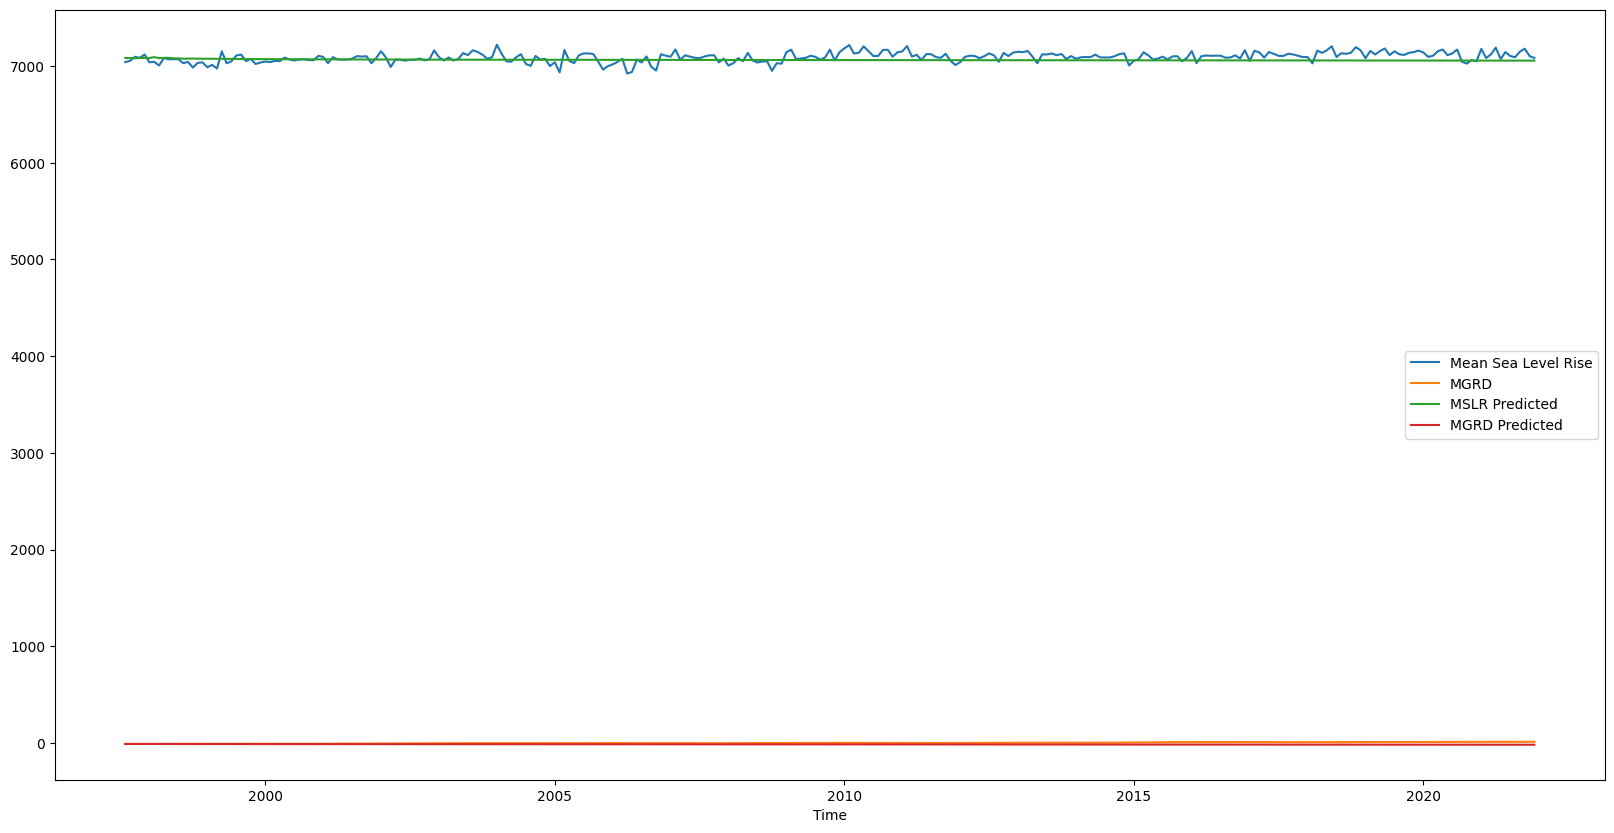

In [73]:
testvpred = pd.concat([test_data, finalprediction], axis=1)
testvpred.plot(figsize=(20,10))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

MSLR_ulc=math.sqrt(mean_squared_error(predictions['MSLR Predicted'],test_data['Mean Sea Level Rise']))
print('Mean value of MSLR is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['Mean Sea Level Rise']),MSLR_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['MGRD Predicted'],test_data['MGRD']))
print('Mean value of MGRD is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['MGRD']),rmse_rgnp))

Mean value of MSLR is : 7091.847097409235. Root Mean Squared Error is :60.311851428087024
Mean value of MGRD is : 0.10059726962464285. Root Mean Squared Error is :17.875981373852547


<Axes: xlabel='Time'>

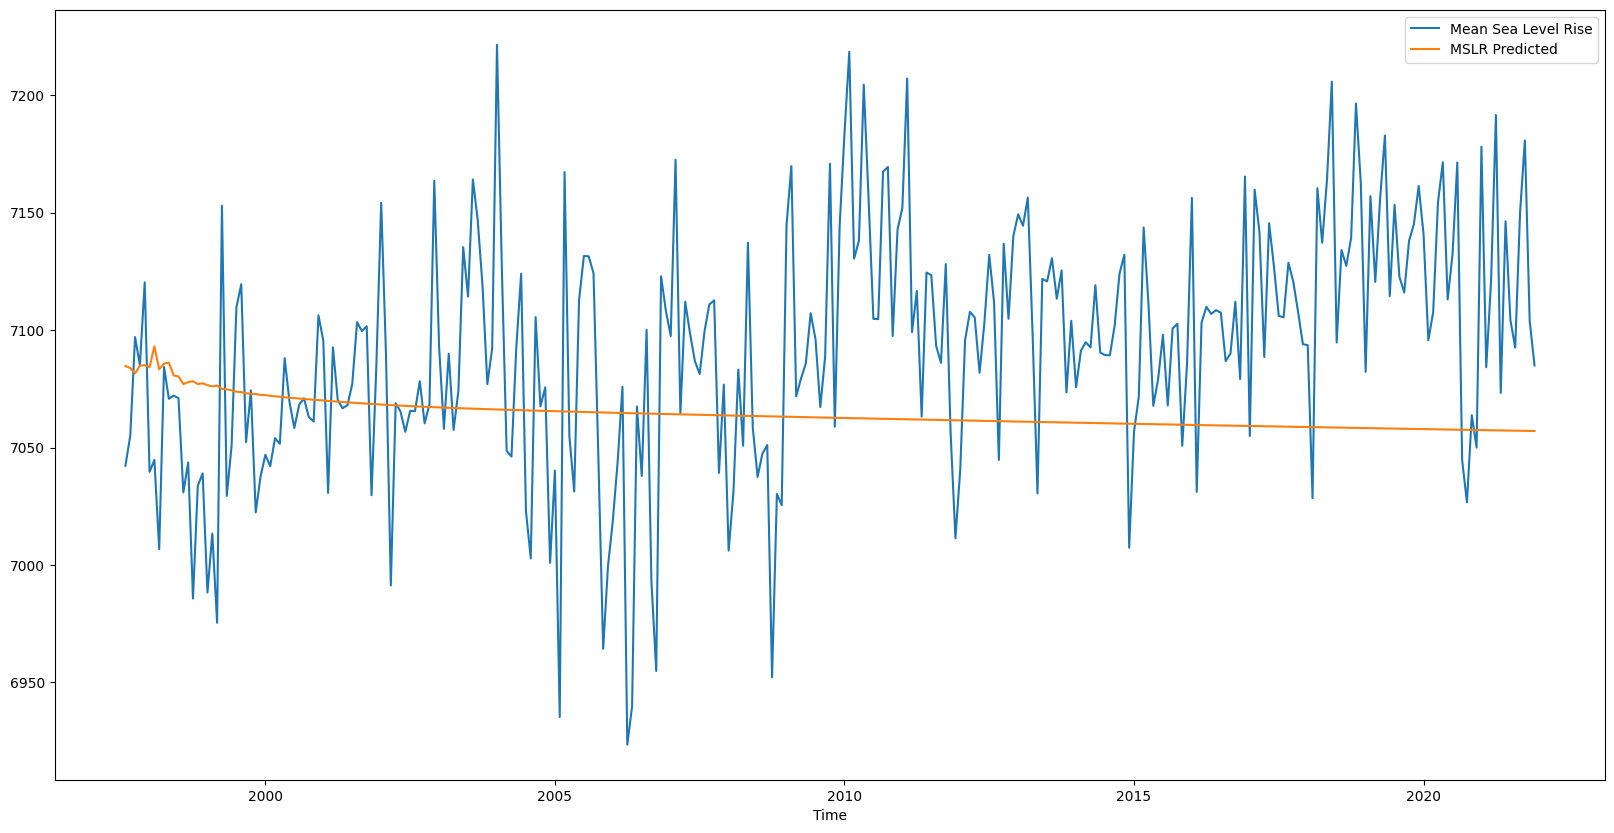

In [76]:
test_data = test_data[["Mean Sea Level Rise"]]
finalprediction = finalprediction[["MSLR Predicted"]]
graph = pd.concat([test_data, finalprediction], axis=1)
graph.plot(figsize=(20,10))